In [1]:
%load_ext memory_profiler

In [2]:
# Removes CPU usage limit by some jupyter versions
import os
os.environ['KMP_AFFINITY'] = ''
#Create input data folder
current_path = os.getcwd()
print(current_path)


/mnt/iusers01/fatpou01/bmh01/msc-healthdatasci-2023-2024/z89953zj/models/dictys


In [3]:
import psutil
memory_info = psutil.virtual_memory()

print(f"Total Memory: {memory_info.total / (1024 * 1024):.2f} MB")
print(f"Available Memory: {memory_info.available / (1024 * 1024):.2f} MB")


Total Memory: 2063080.44 MB
Available Memory: 1226998.46 MB


4. Network analysis

Note: network inference depends on many factors, e.g. pseudo-randomness, randomness, and software version. Your figures may vary from those shown here.
Regulation marker discovery based on target count & specificity between cell subsets

First we perform global analyses with all GRNs. We can use the reconstructed context specific GRNs to find regulation marker genes based on their regulatory activity.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dictys.plot.static import compute_spec
from dictys.plot import dotplot
from dictys.net import network

peak memory: 2210.12 MiB, increment: 1911.21 MiB
CPU times: user 6.2 s, sys: 715 ms, total: 6.91 s
Wall time: 11 s


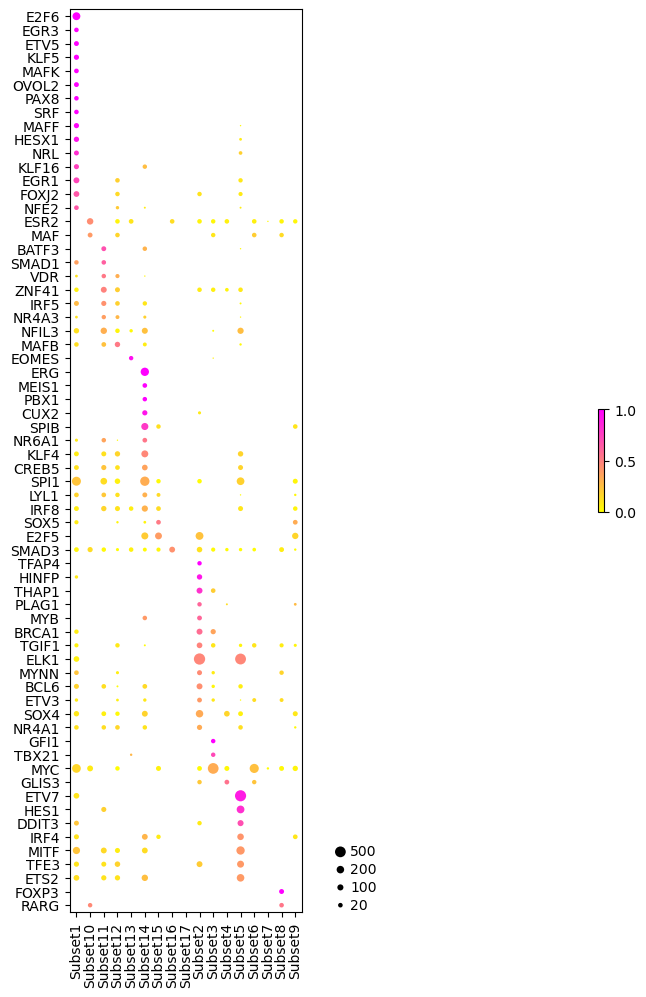

In [5]:
%%time
%%memit
#Load networks
d0=network.from_file('./output/static.h5')

#Regulation markers based on TF regulatory activity (by target count) and its specificity
#Color map of specificity
cmap='spring_r'
#Node sizes to draw legend in dot plot
node_size_deg=[20,100,200,500]
#Transformation from target count to node size
node_size_map_deg=lambda x:x*(x<=10)+(10+(x-10)*500/10/490)*(x>10)

#Find marker genes based on regulatory activity specificity
#Arguments control how many top markers to show and the cutoffs for target count, its specificity at the most abundant cell subset, and its entropy over all cell subsets
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
#Draw dot plot with regulatory activity and its specificity
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)


In [8]:
#fig.savefig('regulatory_activity.png')

In [6]:
print(deg.loc[regmarker])
print(deg_spec.loc[regmarker])

       Subset1  Subset10  Subset11  Subset12  Subset13  Subset14  Subset15  \
E2F6       227         0         0         0         0         0         0   
EGR3        19         0         0         0         0         0         0   
ETV5        34         0         0         0         0         0         0   
KLF5        48         0         0         0         0         0         0   
MAFK        24         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
MITF       177         0        87        43         0        84         0   
TFE3        49         0        39        66         0         0         0   
ETS2        77         0        51        54         0       119         0   
FOXP3        0         0         0         0         0         0         0   
RARG         0        13         0         0         0         0         0   

       Subset16  Subset17  Subset2  Subset3  Subset4  Subset5  

# Cell type annotation with regulation markers, expression markers, and differential expression

Combining these regulation markers with expression marker (based on logCPM) and the differential expression results from the official page, we can annotate each cell subset with their nominated cell types.


peak memory: 2222.57 MiB, increment: 547.39 MiB
CPU times: user 2.12 s, sys: 349 ms, total: 2.47 s
Wall time: 2.62 s


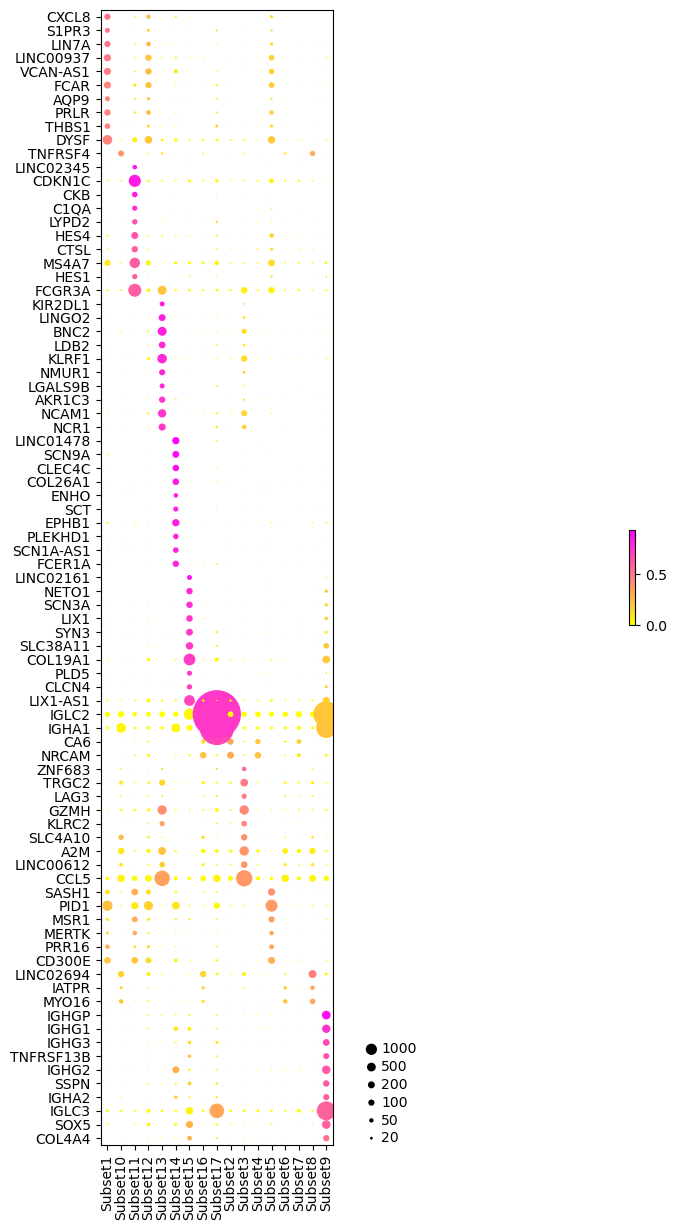

In [7]:
%%time
%%memit
#Expression markers based on gene expression (by CPM) and its specificity
#Node sizes to draw legend in dot plot
node_size_cpm=[20,50,100,200,500,1000]
#Transformation from CPM to node size
node_size_map_cpm=lambda x:x/5*(x<=100)+(20+(x-100)*500/10/990)*(x>100)
#Find marker genes based on expression specificity through the option base='cpm'
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
#Draw dot plot with expression and its specificity
fig1,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)
#fig1.savefig('regulatory_activity1.png')

#Rename cell subsets
d0.rename('s',{
	'Subset1':'Treg','Subset10':'MP','Subset11':'NK.CD56h','Subset12':'DC','Subset13':'Plasma','Subset14':'Th17',
	'Subset2':'Mono.CD14.1','Subset3':'Mono.CD14.2','Subset4':'Tnaive','Subset5':'Tmem.CD4',
	'Subset6':'NK.CD56l','Subset7':'Tmem.CD8','Subset8':'B','Subset9':'Mono.CD16'})

In [8]:
#Rename cell subsets
d0.rename('s',{
	'Subset1': 'Treg',
    'Subset2': 'Mono.CD14.1',
    'Subset3': 'Mono.CD14.2',
    'Subset4': 'Tnaive',
    'Subset5': 'Tmem.CD4',
    'Subset6': 'NK.CD56l',
    'Subset7': 'Tmem.CD8',
    'Subset8': 'B',
    'Subset9': 'Mono.CD16',
    'Subset10': 'MP',
    'Subset11': 'NK.CD56h',
    'Subset12': 'DC',
    'Subset13': 'Plasma',
    'Subset14': 'Th17',
    'Subset15': 'Plasmablast',
    'Subset16': 'DC2',
    'Subset17': 'Erythroid'})

Replot with annotated cell types
Here we redraw these plots for validation. Expression and regulation marker analyses carry different results. The same cell type (Mono.CD14) can be clustered into separate subsets, which may show stronger differences in regulation marker than expression marker. Some other cell type (MP) might show a few regulation marker but not any expression marker.

peak memory: 2238.19 MiB, increment: 550.64 MiB
CPU times: user 3.95 s, sys: 564 ms, total: 4.52 s
Wall time: 4.63 s


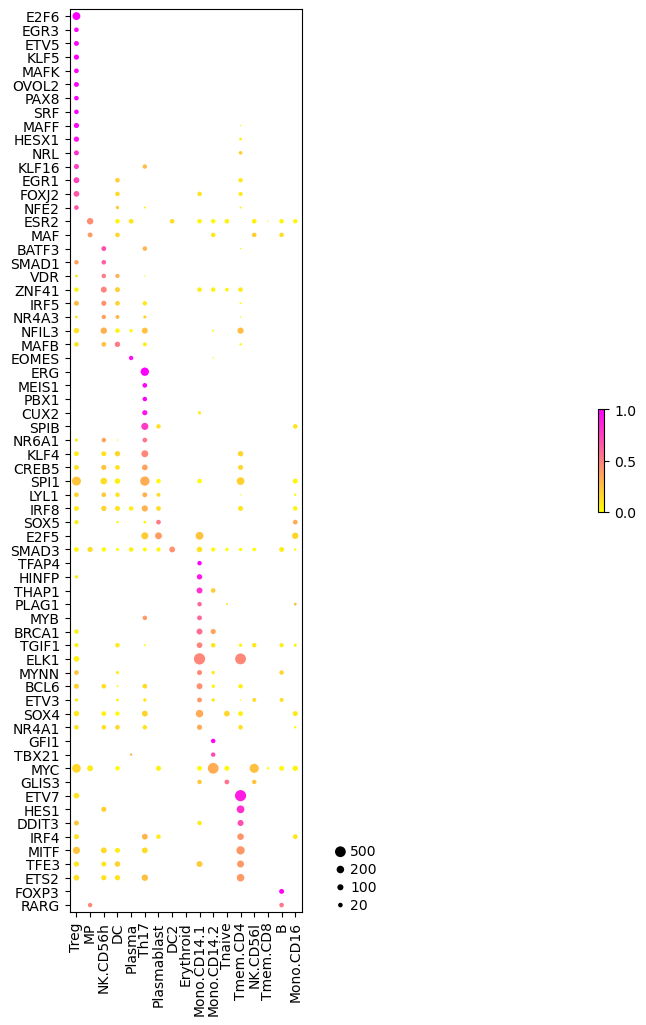

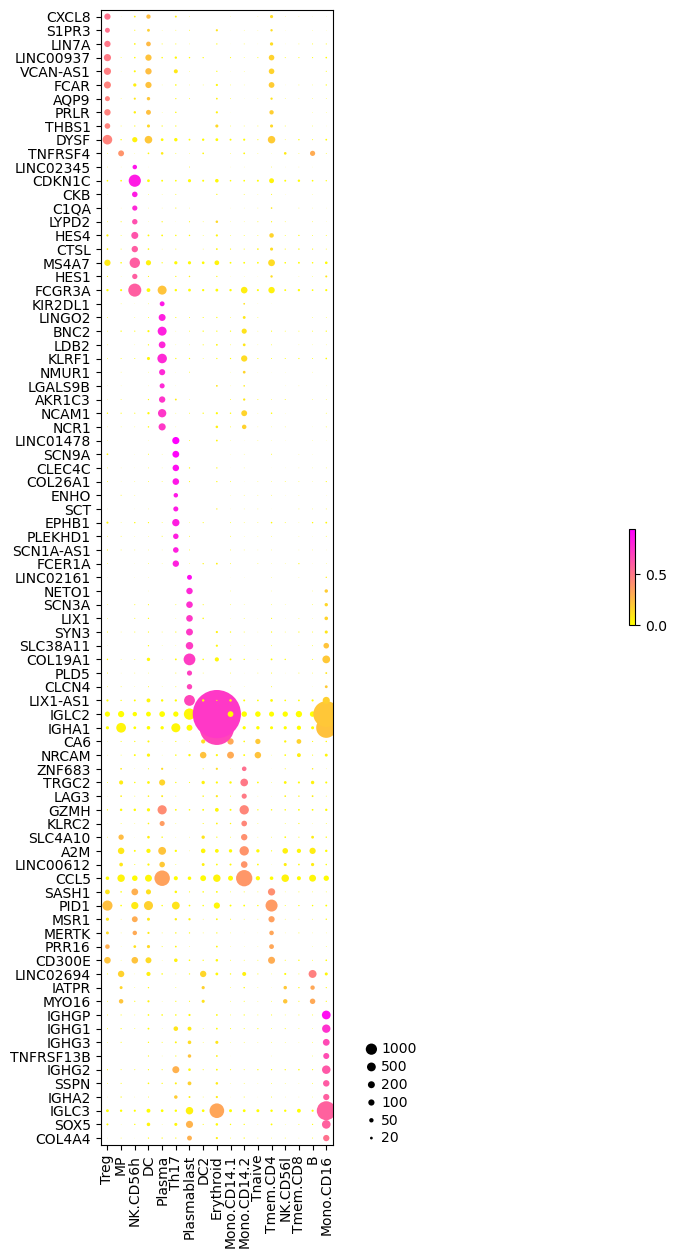

In [9]:
%%time
%%memit
#Redraw of regulation marker plot
deg,deg_spec,cpm,cpm_spec,regmarker,regmarker_state=compute_spec(d0,nmax=15,vmin=10,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(deg.loc[regmarker].iloc[::-1],deg_spec.loc[regmarker].iloc[::-1],size_transform=node_size_map_deg,sizes=np.array(node_size_deg),cmap=cmap)

#Redraw of expression marker plot
deg,deg_spec,cpm,cpm_spec,expmarker,expmarker_state=compute_spec(d0,base='cpm',nmax=10,vmin=50,ncut=0.3,min_entropy=0.7)
fig,ax=dotplot(cpm.loc[expmarker].iloc[::-1],cpm_spec.loc[expmarker].iloc[::-1],size_transform=node_size_map_cpm,sizes=np.array(node_size_cpm),cmap=cmap)


# Heatmap of top target genes of select TFs in their corresponding cell types

Then we move on to investigate select regulation marker TFs. Their top target genes (by regulation strength) in the corresponding cell type may indicate their functional programs.


peak memory: 1723.16 MiB, increment: 1.50 MiB
CPU times: user 215 ms, sys: 23.9 ms, total: 239 ms
Wall time: 347 ms


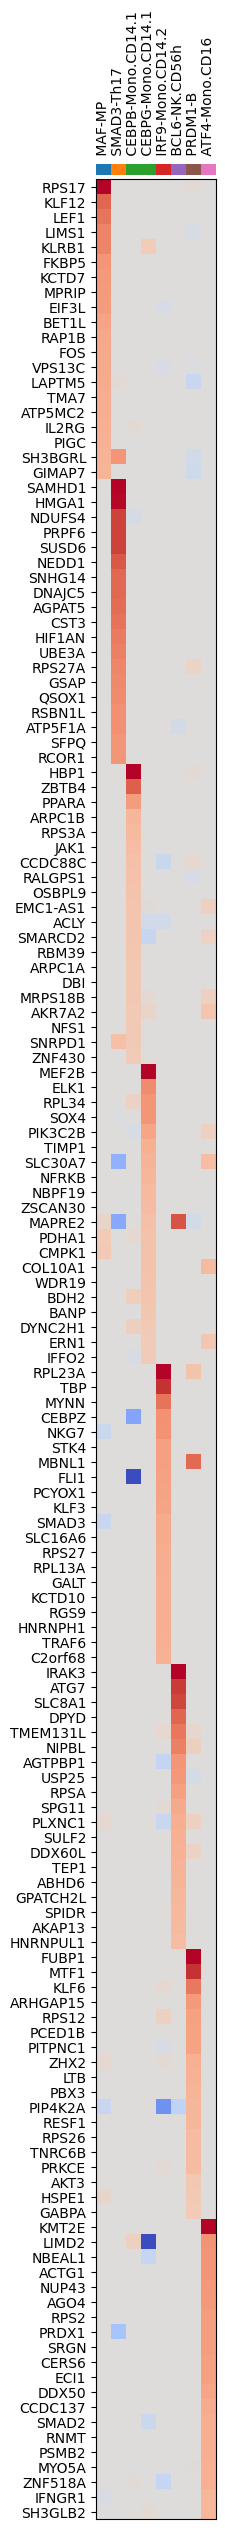

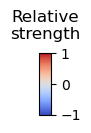

In [10]:
%%time
%%memit
from dictys.plot.static import fig_heatmap_top

#TF-cell type pairs selected from the last step
tf = [
    ('MAF', 'MP'),  
    ('SMAD3', 'Th17'),
    ('CEBPB', 'Mono.CD14.1'), 
    ('CEBPG', 'Mono.CD14.1'),
    ('IRF9', 'Mono.CD14.2'),
    ('BCL6', 'NK.CD56h'),
    ('PRDM1', 'B'),
    ('ATF4', 'Mono.CD16')
]
#Number of top targets for each TF
ntop=20
#Searching for top activated target genes only
direction=1

fig,fig_colorbar,net=fig_heatmap_top(d0,tf,ntop=ntop,direction=direction,aspect=1,gann='all')

peak memory: 1723.41 MiB, increment: 0.25 MiB
CPU times: user 109 ms, sys: 21.9 ms, total: 131 ms
Wall time: 240 ms


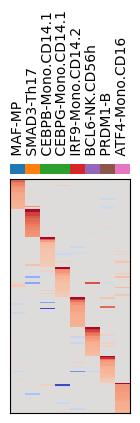

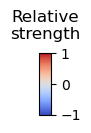

In [11]:
%%time
%%memit
#Only annotating select target genes
#Target genes to annotate
gann='CTLA4,IKZF1'.split(',')
#Aspect ratio
aspect=0.1

fig,fig_colorbar,net=fig_heatmap_top(d0,tf,ntop=ntop,direction=direction,gann=gann,aspect=aspect)


# Differential regulation & differential expression analyses between two cell types

From the above global-level analyses, we zoom in for two cell types to understand the differences in their programs. Lacking a HSC population, here we compare T regs and B cells as an example.

Differential expression logFC is the log Fold Change in expression level (CPM+1). Differential regulation logFC is the log Fold Change in regulatory activity (target count+1). They each may highlight different genes for further investigations. So we plot these two axes together to understand their differences and similarities, and to inform downstream analyses.


peak memory: 1751.25 MiB, increment: 27.84 MiB
CPU times: user 766 ms, sys: 136 ms, total: 903 ms
Wall time: 1.58 s


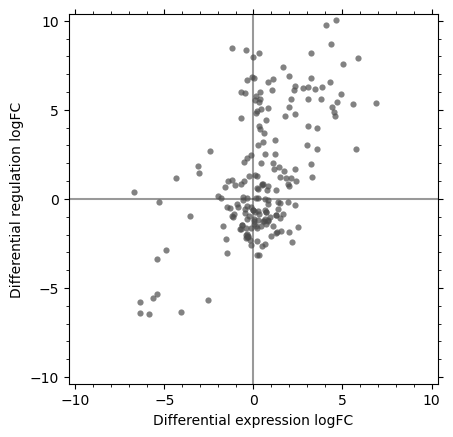

In [12]:
%%time
%%memit
from dictys.plot.static import fig_diff_scatter,fig_diff_rank

#Cell type/state names to compare in (reference, alternative) format. Here it is Treg v.s. B.
states=('B','Treg')

fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states)


peak memory: 1751.77 MiB, increment: 47.55 MiB
CPU times: user 1.86 s, sys: 91.7 ms, total: 1.95 s
Wall time: 2.07 s


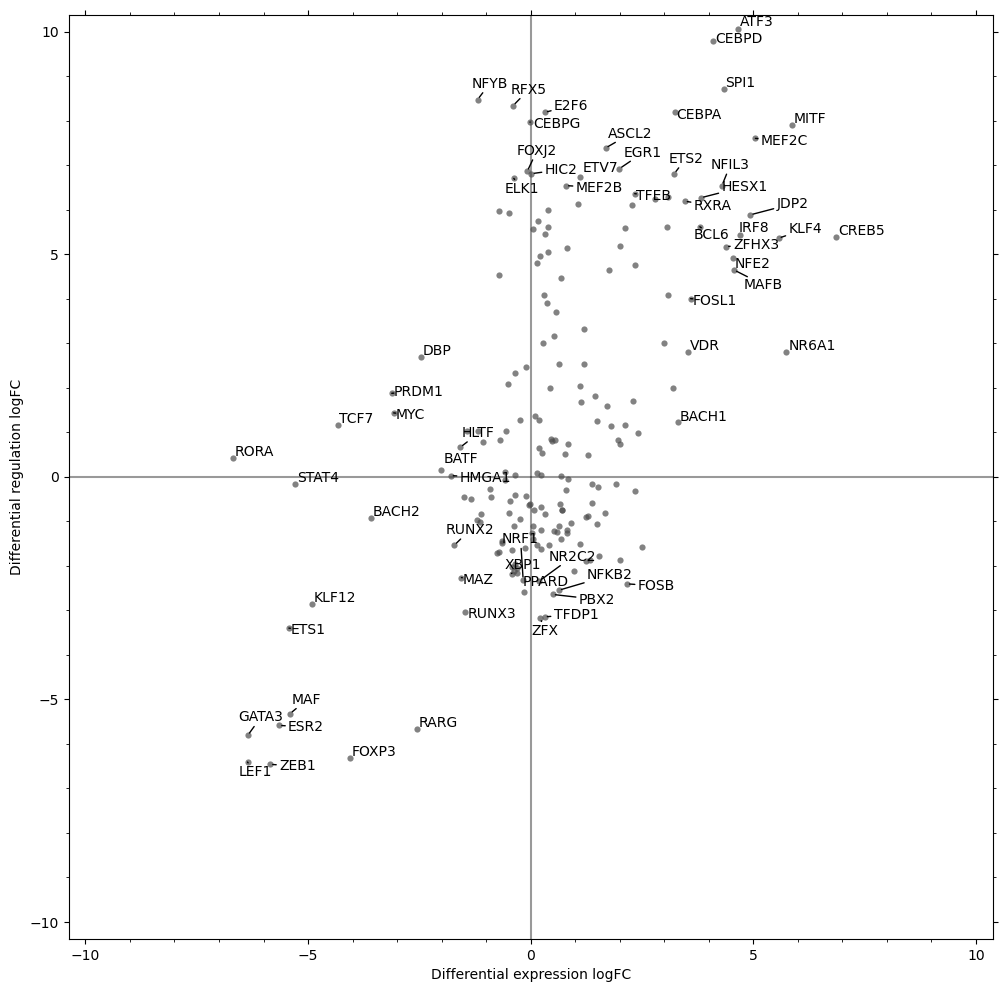

In [13]:
%%time
%%memit
#Number of top genes to annotate on each side
ntop=20
#Find genes to annotate
annotate=np.partition(data.values,[ntop-1,-ntop],axis=0)
annotate=((data.values<=annotate[ntop-1])|(data.values>=annotate[-ntop])).any(axis=1)
annotate=list(data.index[annotate])
#Draw figure
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


In [14]:
fig.savefig('plot1.png')

peak memory: 1751.77 MiB, increment: 42.99 MiB
CPU times: user 1.74 s, sys: 93.6 ms, total: 1.83 s
Wall time: 1.95 s


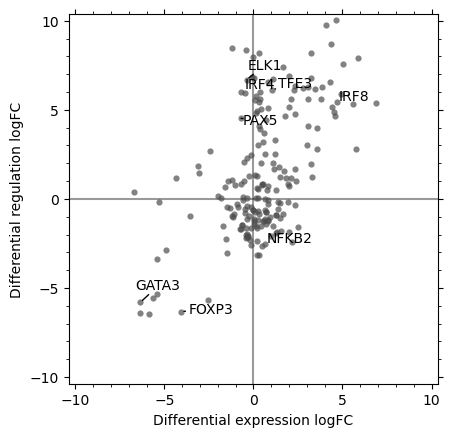

In [15]:
%%time
%%memit
#Select genes to annotate
annotate='SPIB,IRF4,PAX5,IRF4,IRF8,NFKB2,FOXP3,GATA3,ELK1,TFE3'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
data=fig_diff_scatter(d0,ax,states,annotate=annotate)


Integrative TF ranking

We can also perform an integrative TF ranking using the mean logFC of both differential analyses. This can combine both information sources to improve this ranking on cell-type specificity.


peak memory: 1705.95 MiB, increment: 0.75 MiB
CPU times: user 2.57 s, sys: 23.2 ms, total: 2.6 s
Wall time: 2.71 s


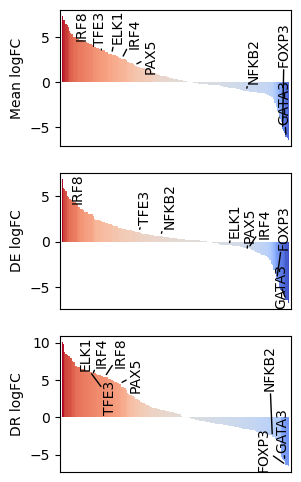

In [16]:
%%time
%%memit
annotate='IRF4,PAX5,IRF8,NFKB2,FOXP3,GATA3,ELK1,TFE3'.split(',')
fig2=fig_diff_rank(data,annotate=annotate)


In [17]:
fig2.savefig('plot2.png')

# Draw target gene subnetwork from a TF

We can further zoom in for a particular TF in the relevant context and look at its targets.
##  Example 1: GATA3 targets in B

As before, we first draw a large figure and annotate all genes to determine which we ultimately need.


peak memory: 2730.10 MiB, increment: 1023.90 MiB
CPU times: user 659 ms, sys: 206 ms, total: 865 ms
Wall time: 980 ms


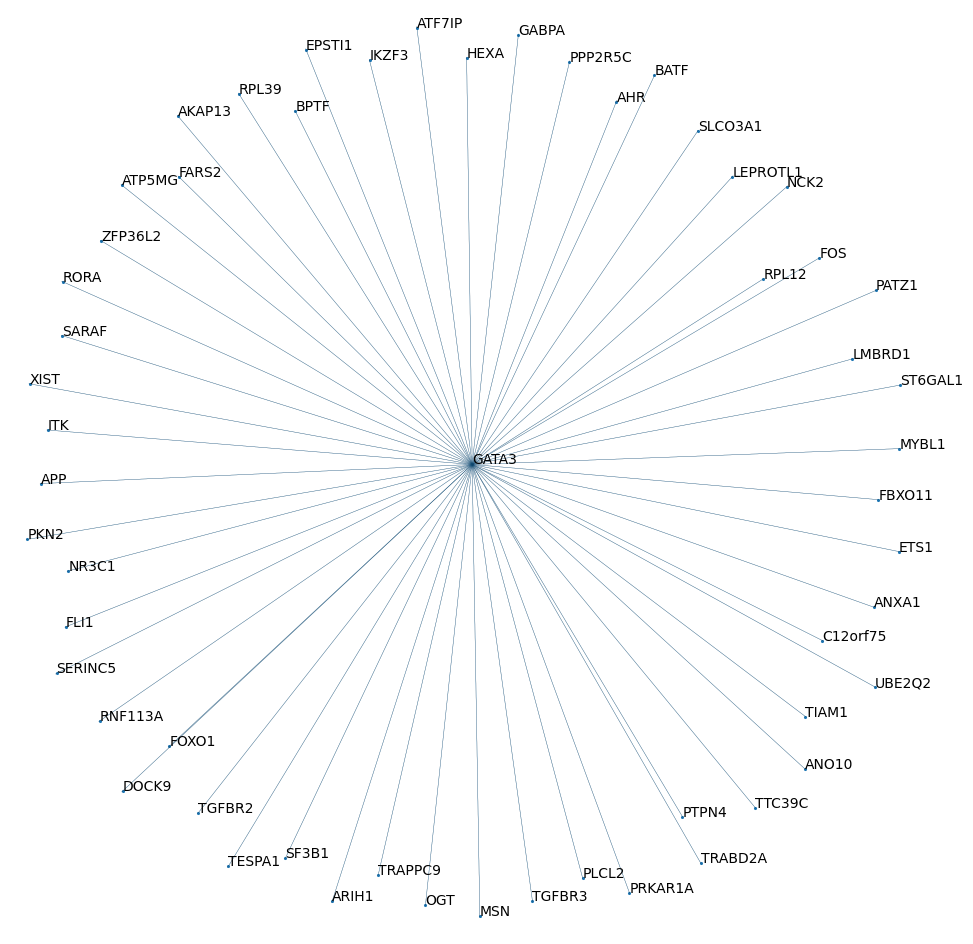

In [18]:
%%time
%%memit
from dictys.plot.static import fig_subnet
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['GATA3'],annotate='all')


In [19]:
fig.savefig('plot3.png')

peak memory: 2734.86 MiB, increment: 1022.42 MiB
CPU times: user 661 ms, sys: 202 ms, total: 863 ms
Wall time: 975 ms


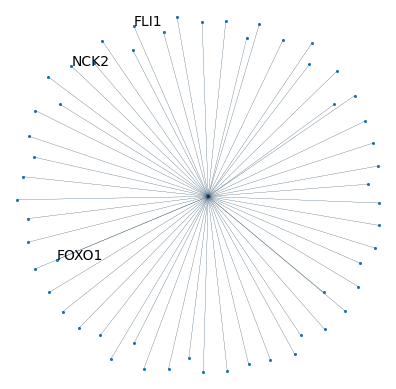

In [20]:
%%time
%%memit
#Select genes to annotate
annotate='SPIB,IGHM,ZNF131,WDR48,UBXN1,ADK,GABPB1,COX7C,MED17,TCL1A,FLAD1,PAPOLA,NCK2,PHACTR1,CCR6,TBC1D22A,FCRL1,FCRL2,CD52,FCRL5,PRKCB,SP110,NCOA3,CD180,PIAS1,FCHSD2,BANK1,TBC1D5,IGHD,AIDA,SP100,ABCB4,SP140,FOXO1,MALT1,CNN2,DGUOK,ADAM28,SNX2,DPH5,IGHA1,RWDD3,SMAD3,KDM4C,WTAP,FLI1,IL7,POU2AF1,FAM30A,HLA-DRA,SP140L,RPS21'.split(',')
fig=plt.figure()
ax=fig.add_subplot(111)
nodes,edges=fig_subnet(d0,ax,'B',regulators=['GATA3'],annotate=annotate)


In [21]:
%memit

peak memory: 1707.91 MiB, increment: 0.00 MiB


# export the networks into tsv files

In [ ]:
%%time
%%memit

#Folder to export networks to
output_folder='./output/static'
#Choose which sparsities (proportion of edges present) to export network
#Use None to export continuous network
sparsities=[None,0.01]
d0.export(output_folder,sparsities=sparsities)
